In [58]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Load the shapefile for India
shapefile_path = r"C:\Users\HP\Downloads\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp"
gdf = gpd.read_file(shapefile_path)

# Filter the data to get India's shape
india_gdf = gdf[gdf['ADMIN'] == 'India']

#data = pd.read_csv(r"C:\Users\HP\Documents\Data_Science_Course\Curriculum\Case_Studies_and_Projects\Web_Scraping_assignment_Newbieron\Income_per_capita_dataset.csv")

In [59]:
# Print the India GeoDataFrame to inspect its contents
print(india_gdf)

         featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
98  Admin-0 country          1          2      India    IND         0      2   

                 TYPE TLC  ADMIN  ... FCLASS_TR  FCLASS_ID FCLASS_PL  \
98  Sovereign country   1  India  ...       NaN        NaN       NaN   

   FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
98       NaN        NaN       NaN       NaN        NaN       NaN   

                                             geometry  
98  POLYGON ((97.32711 28.26158, 97.40256 27.88254...  

[1 rows x 169 columns]


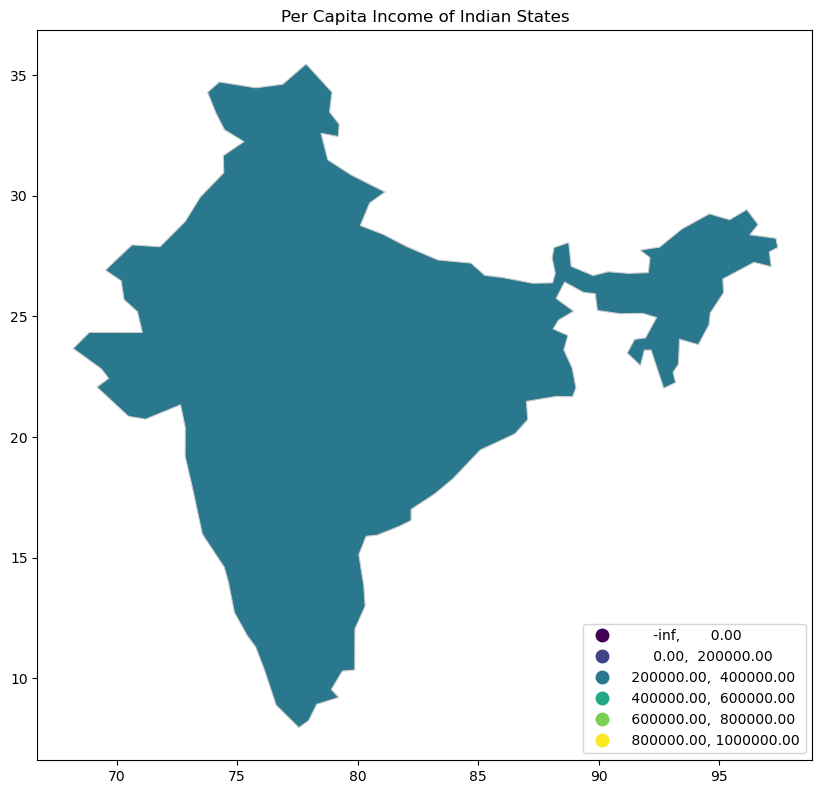

In [68]:
# Create a synthetic dataset with random per capita income for each state
np.random.seed(42)
states = ['Goa', 'Sikkim', 'Delhi', 'Chandigarh', 'Karnataka', 'Haryana', 'Telangana', 'Gujarat', 'Tamil Nadu', 'Puducherry', 'Kerala', 'Maharashtra', 'Arunachal Pradesh', 'Himachal Pradesh', 'Uttarakhand', 'Andhra Pradesh', 'Punjab', 'India', 'Mizoram', 'Nagaland', 'West Bengal', 'Tripura', 'Rajasthan', 'Chhattisgarh', 'Madhya Pradesh', 'Jammu & Kashmir-UT', 'Odisha', 'Manipur', 'Assam', 'Meghalaya', 'Jharkhand', 'Uttar Pradesh', 'Bihar']

# Generate per capita income values for each state with a larger range and unique values
per_capita_income = np.random.choice(np.arange(50000, 1000000, 10000), len(states), replace=False)

# Create a DataFrame from the synthetic data
data_df = pd.DataFrame({'State_Name': states, 'per_capita_income': per_capita_income})

# Merge the data with the shapefile GeoDataFrame
merged_gdf = india_gdf.merge(data_df, left_on='ADMIN', right_on='State_Name')

# Define custom color bins for different classes
num_classes = 5
color_bins = [0, 200000, 400000, 600000, 800000, 1000000]

# Create a plot and set the color based on Fisher Jenks classification with 5 classes
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_gdf.plot(column='per_capita_income', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, scheme='user_defined', classification_kwds={'bins': color_bins}, legend_kwds={'loc': 'lower right'}, aspect=1)

# Create a title for the plot
ax.set_title("Per Capita Income of Indian States", fontsize=12)

# Save or show the plot
plt.savefig("india_per_capita_income_map.png", dpi=300)
plt.show()